In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import needed packages
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,Conv2D,BatchNormalization, Activation, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input


In [ ]:
# Base model without Fully connected Layers
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
x=base_model.output

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers[:26]:
    layer.trainable = False

In [ ]:
num_class = 4
 
x=Flatten()(x)
x=Dense(4096, activation='relu')(x) 
x = Dense(4096, activation='relu')(x)

preds=Dense(num_class, activation='softmax')(x) #final layer with softmax activation

model = Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for i,layer in enumerate(model.layers):
  print("{}: {}".format(i,layer))

0: <keras.engine.input_layer.InputLayer object at 0x7f352661f210>
1: <keras.layers.convolutional.Conv2D object at 0x7f35202ac190>
2: <keras.layers.convolutional.Conv2D object at 0x7f351fd97110>
3: <keras.layers.pooling.MaxPooling2D object at 0x7f351e246410>
4: <keras.layers.convolutional.Conv2D object at 0x7f351018d210>
5: <keras.layers.convolutional.Conv2D object at 0x7f35101924d0>
6: <keras.layers.pooling.MaxPooling2D object at 0x7f351019c650>
7: <keras.layers.convolutional.Conv2D object at 0x7f35101923d0>
8: <keras.layers.convolutional.Conv2D object at 0x7f35101a0f10>
9: <keras.layers.convolutional.Conv2D object at 0x7f35101ac190>
10: <keras.layers.pooling.MaxPooling2D object at 0x7f35101b1fd0>
11: <keras.layers.convolutional.Conv2D object at 0x7f35101a8f50>
12: <keras.layers.convolutional.Conv2D object at 0x7f35101b8ad0>
13: <keras.layers.convolutional.Conv2D object at 0x7f3510140c10>
14: <keras.layers.pooling.MaxPooling2D object at 0x7f35101b8750>
15: <keras.layers.convolutional.C

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Final year project /Dataset/Segmented',
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 
                                                 class_mode='categorical',
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Final year project /Dataset/Segmented', # same directory as training data
                                                target_size=(224,224),
                                                batch_size=64,
                                                class_mode='categorical',
                                                subset='validation') # set as validation data

Found 9353 images belonging to 4 classes.
Found 2337 images belonging to 4 classes.


In [ ]:
epochs = 10
learning_rate = 0.0001
decay_rate = learning_rate / epochs
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
step_size_train = train_generator.n/train_generator.batch_size
step_size_val = validation_generator.samples // validation_generator.batch_size

history = model.fit_generator(
                   generator = train_generator,
                   steps_per_epoch = step_size_train,
                   validation_data = validation_generator, 
                   validation_steps = step_size_val,

                   epochs=10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
146/146 [==============================] - 3505s 24s/step - loss: 2.5422 - accuracy: 0.8377 - val_loss: 0.3549 - val_accuracy: 0.8854
Epoch 2/10
146/146 [==============================] - 63s 431ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.2931 - val_accuracy: 0.9115
Epoch 3/10
146/146 [==============================] - 67s 456ms/step - loss: 0.0496 - accuracy: 0.9811 - val_loss: 0.4257 - val_accuracy: 0.8872
Epoch 4/10
146/146 [==============================] - 66s 454ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.2546 - val_accuracy: 0.9362
Epoch 5/10
146/146 [==============================] - 67s 456ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.2901 - val_accuracy: 0.9332
Epoch 6/10
146/146 [==============================] - 67s 455ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.3180 - val_accuracy: 0.9410
Epoch 7/10
146/146 [==============================] - 67s 456ms/step - loss: 6.2628e-04 - accuracy: 1.0000 - val_loss: 0.3030 - va

In [ ]:
model.save('/content/drive/MyDrive/Final year project /Models/lungs_vgg_segmented.h5')

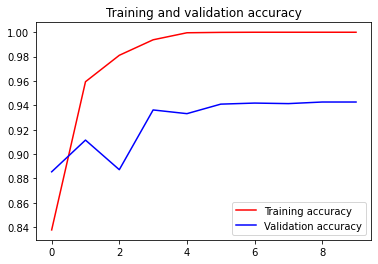

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 432x288 with 0 Axes>

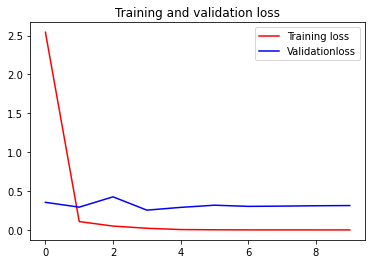

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


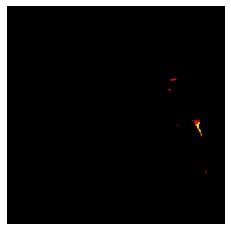

True label: Tubercolosis
Predicted label: Tubercolosis


In [ ]:
import matplotlib.pyplot as plt
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES= ['COVID','NORMAL','PNEUMONIA','TUBERCOLOSIS']
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    img_array = img_array / 255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)


prediction = model.predict(prepare('/content/drive/MyDrive/Final year project /Dataset/Segmented/Tubercolosis/Tubercolosis-1.png'))
prediction = np.argmax(prediction,-1)
print(prediction)
print(CATEGORIES[int(prediction[0])])

[3]
tbuer
